In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [4]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-(H - mu)**2 / (2 * sigma**2))

second_prior = np.vectorize(gaussian_prior)


def third_prior(H):

    a, b = 0.5, 0.5

    return (np.exp(-1000*H**2) + np.exp(-1000*(H - 1)**2))


third_prior = np.vectorize(third_prior)
second_prior(0.4)

array(0.00386592)

### Bonus point

Why do we need to use np.vectorize here?

this function acts on an array and gives us array.Don't know more

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [5]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

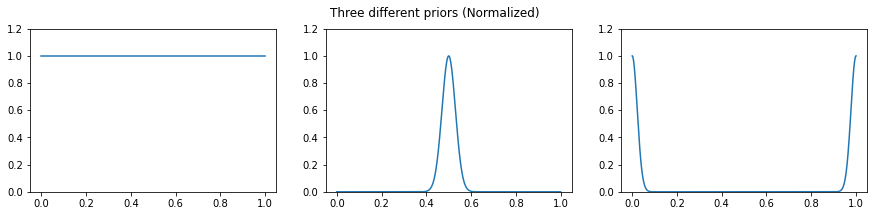

In [6]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3,1)
plt.plot(H,first_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,2)
plt.plot(H,second_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,3)
plt.plot(H,third_prior(H))
plt.ylim([0,1.2])

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

round-off error is the difference between true value & the approximation used in computation .we used "float" because here numbers are small and we need a good precision .

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [7]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [8]:
def posterior(data, n, H):
    ones = np.sum(data)
    zeros = len(data) - ones
    
    if n == 1:
        return first_prior(H) * H**ones * (1-H)**zeros / max(first_prior(H) * H**ones * (1-H)**zeros)
    
    if n == 2:
        return second_prior(H) * H**ones * (1-H)**zeros / max(second_prior(H) * H**ones * (1-H)**zeros)
    
    if n == 3:
        return third_prior(H) * H**ones * (1-H)**zeros / max(third_prior(H) * H**ones * (1-H)**zeros)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  app.launch_new_instance()


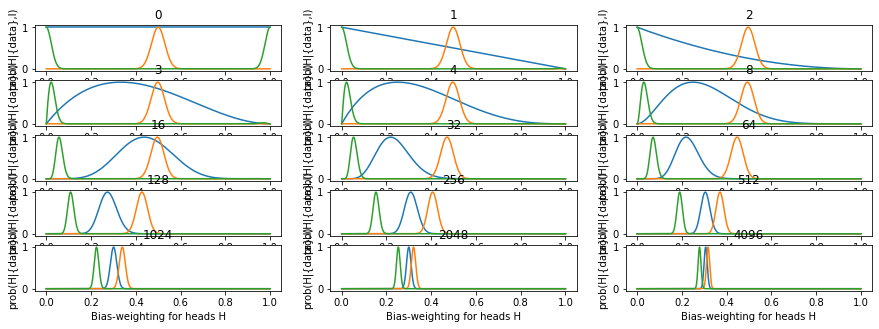

In [9]:
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(15, 3, i+1)
    plt.xlabel("Bias-weighting for heads H")
    plt.ylabel("prob(H|{data},I)")
    
    if i < 4:
        plt.title(str(i))
    
    else:
        plt.title(str(2**(i-2)))
    
    for n in range(3):
        plt.plot(H, posterior(data[i], n+1, H))

plt.tight_layout(h_pad = 3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [ ]:
import numpy as np
def raw_moment_n(data, n):
    return np.sum(np.array(data)**n) / len(data)

## (b)

Write a function to calculate central moments of a given distribution

In [ ]:
def central_moment_n(data, n):
    return np.sum((np.array(data) - np.mean(data))**n) / len(data)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [ ]:
b = np.random.binomial(30, 0.7, 10**6)
p = np.random.poisson(2.1, 10**6)
g = np.random.normal(2.1, 0.3, 10**6)

for i in range(1,4):
  print("Binomial raw moment",i,"is",raw_moment_n(b,i))

for j in range(1,4):
  print("Binomial central moment", j, "is", central_moment_n(b,j))

for i in range(1,4):
  print("Poisson raw moment",i,"is",raw_moment_n(p,i))

for j in range(1,4):
  print("Poison central moment", j, "is", central_moment_n(p,j)) 

for i in range(1,4):
  print("guassion raw moment",i,"is",raw_moment_n(g,i))

for j in range(1,4):
  print("guassion central moment", j, "is", central_moment_n(g,j))   

Binomial raw moment 1 is 21.000321
Binomial raw moment 2 is 447.308145
Binomial raw moment 3 is 9655.449903
Binomial central moment 1 is 4.283720045350492e-16
Binomial central moment 2 is 6.294662896959002
Binomial central moment 3 is -2.5446107604028407
Poisson raw moment 1 is 2.10148
Poisson raw moment 2 is 6.519916
Poisson raw moment 3 is 24.670504
Poison central moment 1 is -1.0255263305225526e-16
Poison central moment 2 is 2.1036978096
Poison central moment 3 is 2.127273178483583
guassion raw moment 1 is 2.1000791390676095
guassion raw moment 2 is 4.500356555442601
guassion raw moment 3 is 9.829163267183676
guassion central moment 1 is -4.744222792396613e-16
guassion central moment 2 is 0.09002416509565289
guassion central moment 3 is -5.739552621648784e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [ ]:
from scipy import stats

In [ ]:
for i in range (1,4):
    print('Binomial moment', i, 'is', stats.moment(b,i))

for i in range (1,4):
    print('Poisson moment', i, 'is', stats.moment(p,i))

for i in range (1,4):
    print('Guassion moment', i, 'is', stats.moment(g,i))

Binomial moment 1 is 0.0
Binomial moment 2 is 6.294662896959002
Binomial moment 3 is -2.5446107604028407
Poisson moment 1 is 0.0
Poisson moment 2 is 2.1036978096
Poisson moment 3 is 2.1272731784835828
Guassion moment 1 is 0.0
Guassion moment 2 is 0.09002416509565289
Guassion moment 3 is -5.739552621648779e-05


it has calculated central moments

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
from pandas import DataFrame, read_csv


In [21]:
data = np.loadtxt("data.txt")
Frame = DataFrame(data, columns = ["time passed","number of events"])
Frame

OSError: ignored

In [ ]:
...

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.